In [119]:
import pandas as pd
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
df = pd.read_csv('parkinsons.csv').drop(columns = ['name'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [105]:
X = df.drop('status', axis=1)
y = df['status']

In [106]:
xgb = XGBClassifier()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, stratify=y)

In [126]:
search_space = {
    'n_estimators': Integer(0,100),
    'learning_rate': Real(0,1),
    'max_depth': Integer(3,10),
    'gamma': Real(0,10)
}

In [127]:
opt = BayesSearchCV(xgb, search_space, n_iter=15, cv=3)

In [128]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              n_iter=15,
              search_spaces={'gamma': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=0, high=100, prior='uniform', transform='normalize')})

In [129]:
xgboost_model = opt.best_estimator_

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

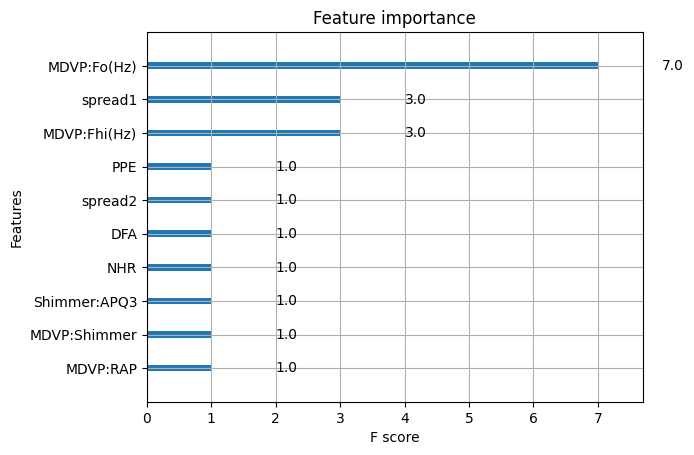

In [130]:
plot_importance(xgboost_model)

In [131]:
matrix = ConfusionMatrixDisplay(confusion_matrix(opt.predict(X_test), y_test))

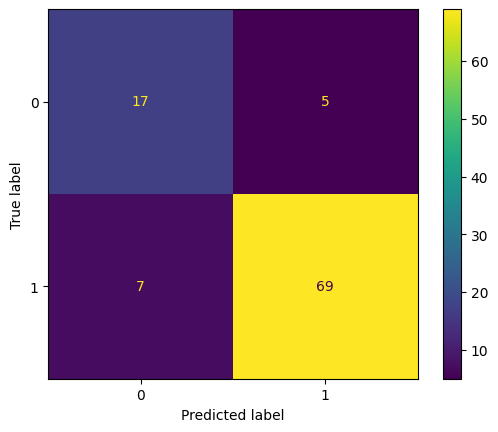

In [133]:
matrix.plot()

In [134]:
accuracy_score(opt.predict(X_test), y_test)

0.8775510204081632